## Retrieving the data

In [0]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'windsor_home_prices'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

home_prices = pd.read_sql_table('windsor_home_prices', con=engine)

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Exploratory data analysis

In [3]:
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [4]:
home_prices.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


We will test whether there is a significant difference in `price` for records where `fullbase` is `yes` versus `no`. Per the [documentation](https://rdrr.io/cran/Ecdat/man/Housing.html), this variable indicates whether the home has a full, finished basement.


Let's split our data into two DataFrames for ease of analysis.

In [5]:
# Split up our dataset
basement_yes = home_prices[(home_prices['fullbase'] == "yes")]
basement_yes.info()

basement_no = home_prices[(home_prices['fullbase'] == "no")]
basement_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

Let's get the sense of how these figures look.

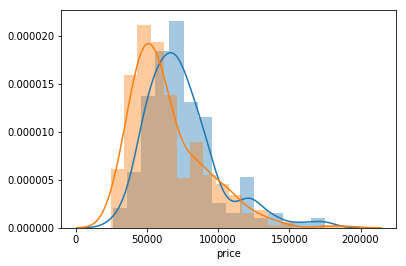

In [6]:
sns.distplot(basement_yes['price'])
sns.distplot(basement_no['price'])

It appears that these are normally distributed. We can examine the descriptive statistics as well to learn more about the distributions.

In [7]:
print(stats.describe(basement_yes['price']))
print(stats.describe(basement_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


## Hypothesis testing

To state our hypotheses formally:

Ho: There is no difference in the average sale price between homes with and without a full basement.  
Ha: There is a difference in the average sale price between homes with and without a full basement.

In [8]:
stats.ttest_ind(basement_yes['price'],basement_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

## How do we interpret these results?

## What can we infer about the populations?